In [1]:
import torch
import matplotlib.pyplot as plt

file_path='logs/dinov2_backbone_dinov2_large/lightning_logs/version_12/neg_num_list.pth'
neg_num_list=torch.load(file_path)

print(len(neg_num_list))

14655


In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 设置采样间隔
sample_interval=150
start_index=5000

without_neg_num_list=[]
with_neg_num_list=[]
indices=[]  # 新增：用于存储索引
for i in range(start_index, len(neg_num_list), sample_interval):
    without_neg_num_list.append(neg_num_list[i][0])
    with_neg_num_list.append(neg_num_list[i][1])
    indices.append(i)  # 新增：记录当前索引

print(f"数据点数量: {len(without_neg_num_list)}")
print(f"索引列表: {indices}")  # 新增：打印索引列表

数据点数量: 65
索引列表: [5000, 5150, 5300, 5450, 5600, 5750, 5900, 6050, 6200, 6350, 6500, 6650, 6800, 6950, 7100, 7250, 7400, 7550, 7700, 7850, 8000, 8150, 8300, 8450, 8600, 8750, 8900, 9050, 9200, 9350, 9500, 9650, 9800, 9950, 10100, 10250, 10400, 10550, 10700, 10850, 11000, 11150, 11300, 11450, 11600, 11750, 11900, 12050, 12200, 12350, 12500, 12650, 12800, 12950, 13100, 13250, 13400, 13550, 13700, 13850, 14000, 14150, 14300, 14450, 14600]


数据已使用pandas保存到 others/negative_samples/negative_pairs_data.csv


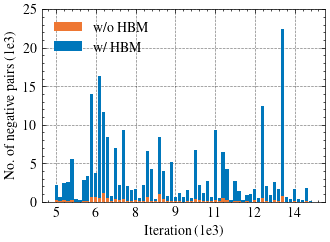

In [13]:

import torch
import matplotlib.pyplot as plt
import numpy as np
import scienceplots


plt.style.use(['science','grid','vibrant'])

# with plt.style.context(['science','ieee','grid','vibrant']):

    # Create figure
plt.figure()


# Draw stacked bar chart
x = np.arange(len(without_neg_num_list))
plt.bar(x, without_neg_num_list, label='w/o HBM', 
)
plt.bar(x, with_neg_num_list, bottom=without_neg_num_list, 
label='w/ HBM')

# 自定义x轴刻度和标签
x_ticks = np.arange(0, len(without_neg_num_list), 10)  # 每隔10个显示一个刻度
# 计算实际的索引值（考虑起始索引和采样间隔）
x_labels = [f'{int((start_index + i * sample_interval)/1000)}' for i in x_ticks]
plt.xticks(x_ticks, x_labels)

# 自定义y轴刻度和标签
y_ticks = plt.yticks()[0]  # 获取当前y轴刻度
y_labels = [f'{int(y/1000)}' for y in y_ticks]  # 将刻度值除以1000
plt.yticks(y_ticks, y_labels)

# Add labels
plt.xlabel('Iteration (1e3)', )
plt.ylabel('No. of negative pairs (1e3)', )
plt.legend(frameon=False)


# 导入pandas库
import pandas as pd

# 创建DataFrame
data = {
    '迭代次数': indices,
    '不使用HBM': without_neg_num_list,
    '使用HBM': with_neg_num_list,
}

df = pd.DataFrame(data)

# 保存为CSV文件
csv_file_path = 'others/negative_samples/negative_pairs_data.csv'
df.to_csv(csv_file_path, index=False)

print(f"数据已使用pandas保存到 {csv_file_path}")

# Adjust layout and display
plt.tight_layout()
# plt.savefig('images/neg_num_list_hbm.png', dpi=600)
plt.show()
